In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('teste_indicium_precificacao.csv')

# Exploratory Data Analysis

In [4]:
df.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [6]:
print(df.describe())

                 id       host_id      latitude     longitude         price  \
count  4.889400e+04  4.889400e+04  48894.000000  48894.000000  48894.000000   
mean   1.901753e+07  6.762139e+07     40.728951    -73.952169    152.720763   
std    1.098288e+07  7.861118e+07      0.054529      0.046157    240.156625   
min    2.595000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.472371e+06  7.822737e+06     40.690100    -73.983070     69.000000   
50%    1.967743e+07  3.079553e+07     40.723075    -73.955680    106.000000   
75%    2.915225e+07  1.074344e+08     40.763117    -73.936273    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimo_noites  numero_de_reviews  reviews_por_mes  \
count   48894.000000       48894.000000     38842.000000   
mean        7.030085          23.274758         1.373251   
std        20.510741          44.550991         1.680453   
min         1.000000           0.000000         

Variáveis como 'price', 'minimo_noites' e 'reviews_por_mes' possues uma grande diferença entra suas médias, mediana e valores máximo, indicando uma distribuição assimétrica à direita bem como a existência de outliers. 

Essas variáveis possivelmente precisarão ser transformadas para o treinamento e teste do modelo.

In [8]:
print(df.isnull().sum())

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64


As colunas numéricas 'ultima_review e 'reviews_por_mes' tem valores faltando e precisarão ser desconsideradas ou zeradas.

As colunas 'nome' e 'host_name' também tem valores faltando, essas serão excluídas para a análise de palavras-chave.

# Hipóteses de negócio
#### Apartamentos em Manhattan e Brooklyn tendem a ter preços mais altos em comparação com outros bairros.

#### Casas/apartamentos inteiros são mais caros do que quartos privados ou compartilhados.

#### Anúncios com menos dias disponíveis por ano (disponibilidade_365) podem cobrar tarifas mais altas devido à escassez.

#### Anúncios com estadias mínimas mais longas (minimo_noites) podem ter tarifas mais baixas para atrair inquilinos de longo prazo.

#### Nomes com palavras-chave como "luxo", "central" ou "vista" estão correlacionados com preços mais altos.

### Análise da distribuição e relação de 'price', 'bairro_group' e 'bairro'

Análise da distribuição de 'price' usando histplot
Análise da distribuição de 'price' em relação ao 'bairro_group' eu optei por usar stripplot porque demonstra melhor a relação entre 'price' e 'bairro_group', em que os outliers são visíveis assim como a concentração de preço.

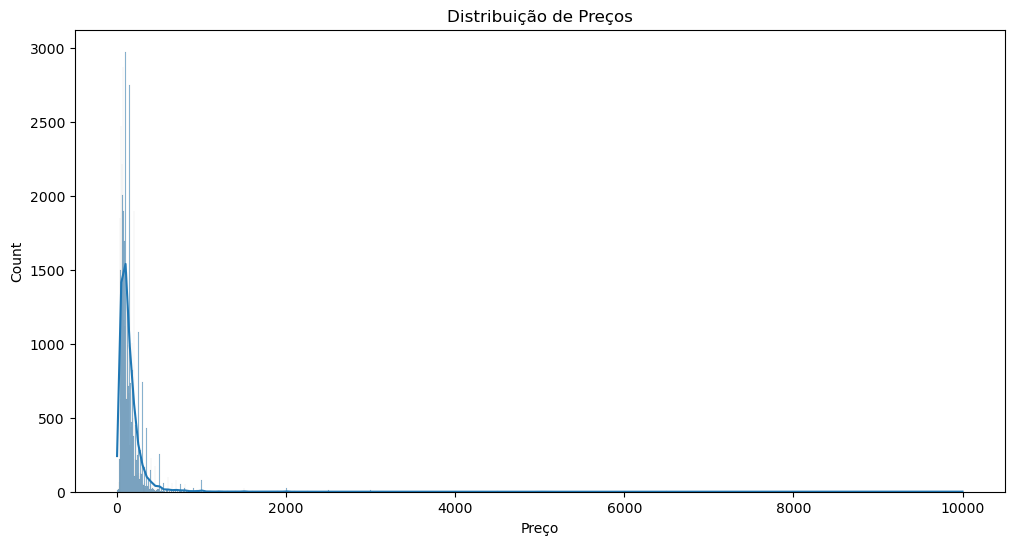

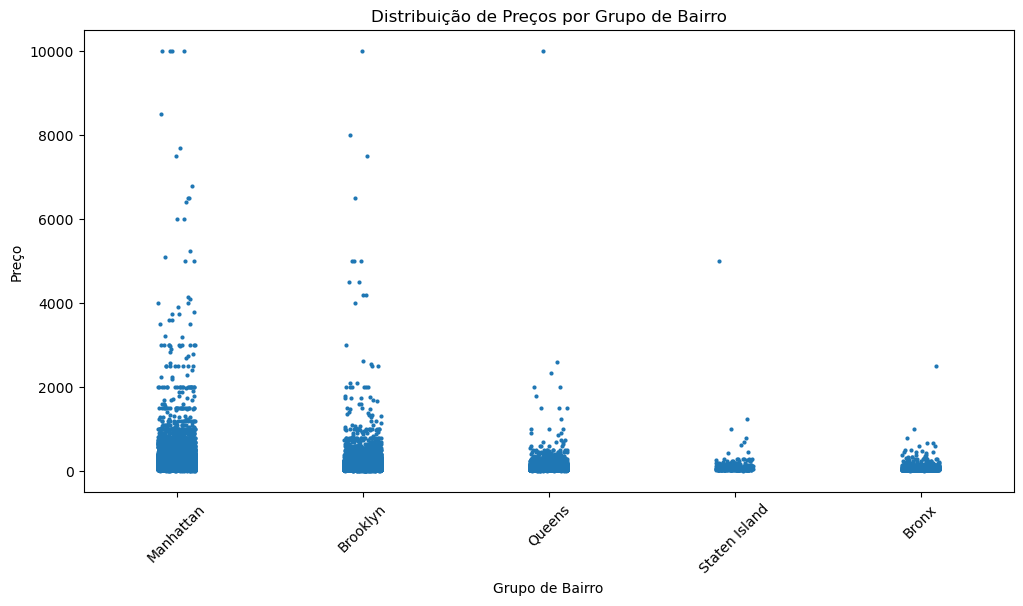

<Figure size 640x480 with 0 Axes>

In [13]:
# Histograma
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribuição de Preços')
plt.xlabel('Preço')

# Distribuição de preço por bairro_group usando stripplot
plt.figure(figsize=(12, 6))
sns.stripplot(x='bairro_group', y='price', data=df, size=3, jitter=True) #'jitter=True' para visualizar a distribuição horizontalmente
plt.title('Distribuição de Preços por Grupo de Bairro')
plt.xlabel('Grupo de Bairro')
plt.ylabel('Preço')
plt.xticks(rotation=45)
plt.show()

plt.tight_layout()
plt.show()

Como o preço era muito assimétrico à direita, com algumas poucas variáveis altíssimas, os outliers, precisará ser normalizado/transformado para a melhor visualização no gráfico, bem como para o treinamento e teste do modelo.
Além disso, por olho eu posso inferir que a maior porcentagem dos preços é inferior a 2000, então também desenhei o gráfico apenas considerando as listagens em que o preço é menor que 2000.

<Figure size 1200x600 with 0 Axes>

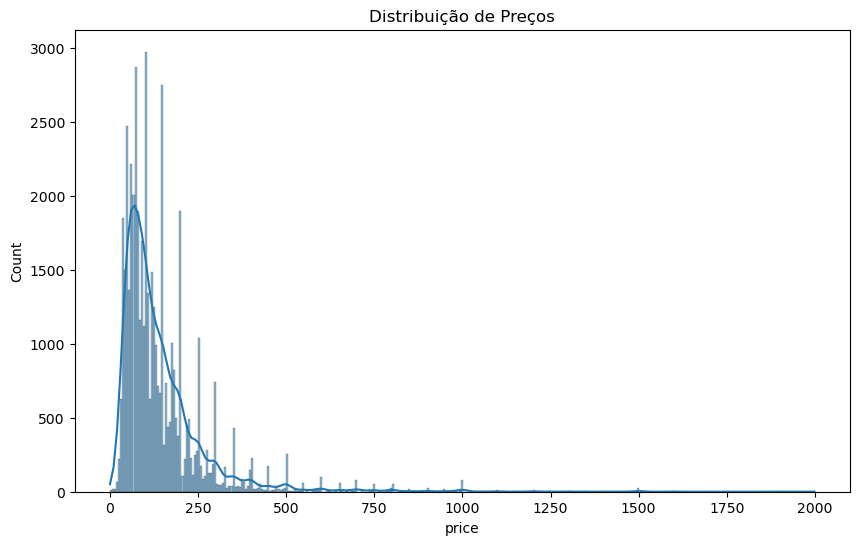

Text(0, 0.5, 'Frequência')

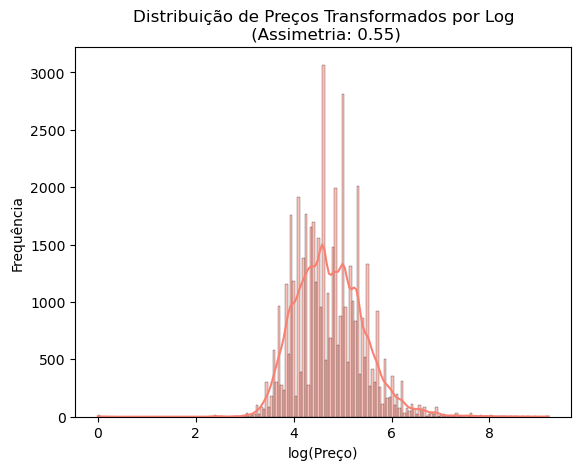

In [15]:
plt.figure(figsize=(12, 6))

# Distribuição de preços menor que 2000
df_filtered2k = df[df['price'] < 2000]

plt.figure(figsize=(10, 6))
sns.histplot(df_filtered2k['price'], kde=True)
plt.title('Distribuição de Preços')
plt.show()

# Distribuição de preços transformados por log
log_price = np.log1p(df['price'])  # Usando log(1+x) para lidar com preços iguais a zero
sns.histplot(log_price, kde=True, color='salmon')
plt.title('Distribuição de Preços Transformados por Log\n (Assimetria: {:.2f})'.format(log_price.skew()))
plt.xlabel('log(Preço)')
plt.ylabel('Frequência')

#### Novo plot da relação de price e bairro_group com delimitação de price em 1000, boxplots demonstrando algumas estatísticas adicionais e o gradiente de cores de acordo com a distribuição de preços.

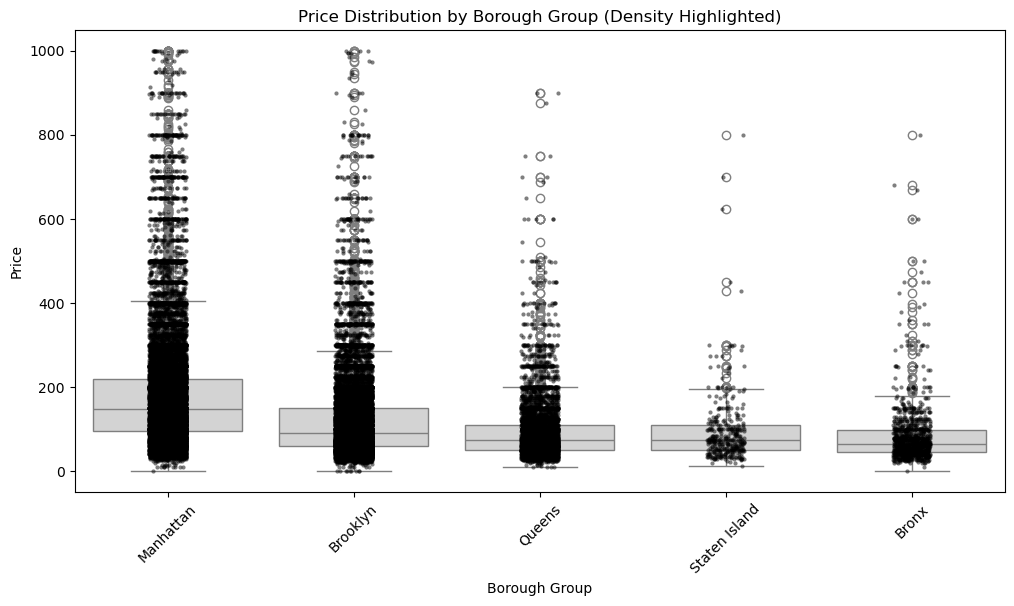

In [17]:
plt.figure(figsize=(12, 6))
df_filtered1k = df[df['price'] < 1000]

# Box plot para estatísticas resumidas
sns.boxplot(x='bairro_group', y='price', data=df_filtered1k, color='lightgray')

# Strip plot para pontos individuais
sns.stripplot(x='bairro_group', y='price', data=df_filtered1k, size=3, jitter=True, color='black', alpha=0.5)

plt.title('Price Distribution by Borough Group (Density Highlighted)')
plt.xlabel('Borough Group')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

## Distribuição de listagens e média de preço por 'bairro'
Como são mais 200 bairros a representação de cada um no gráfico não é adequada, por isso calculei e escolhi os os bairros com 90% de frequência nas listagens.

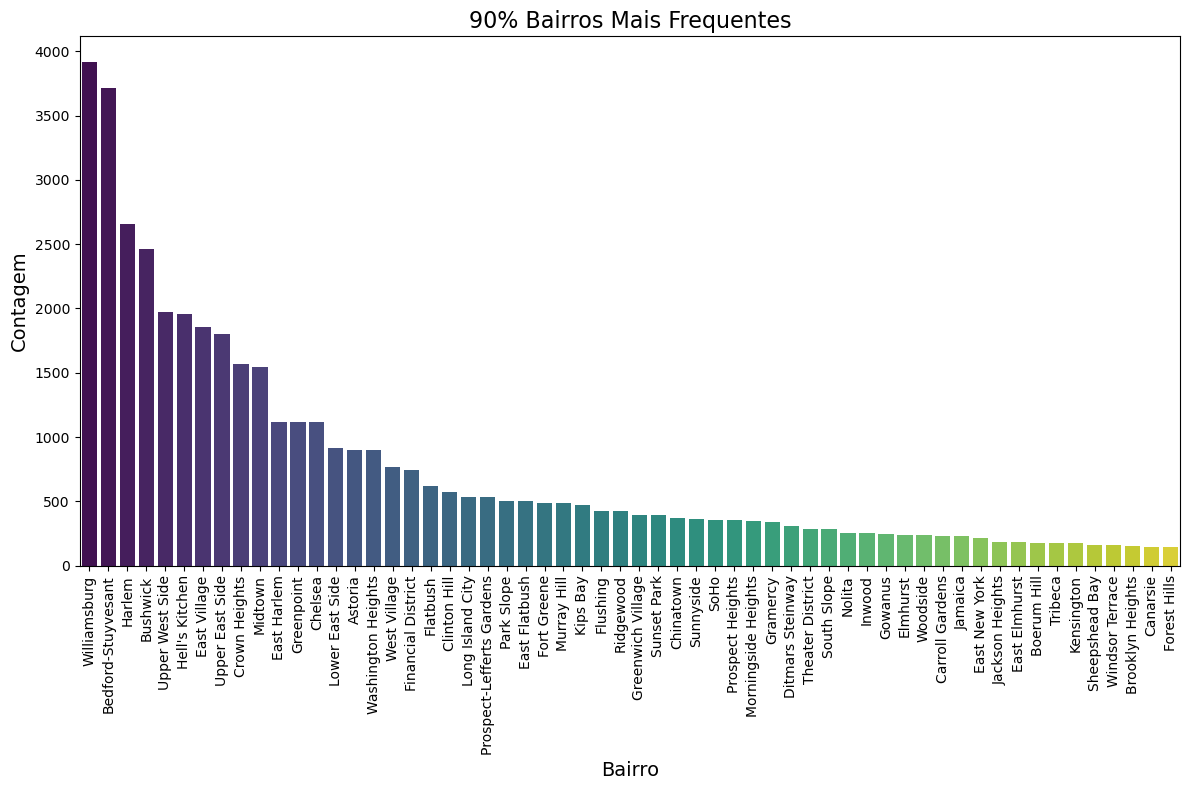

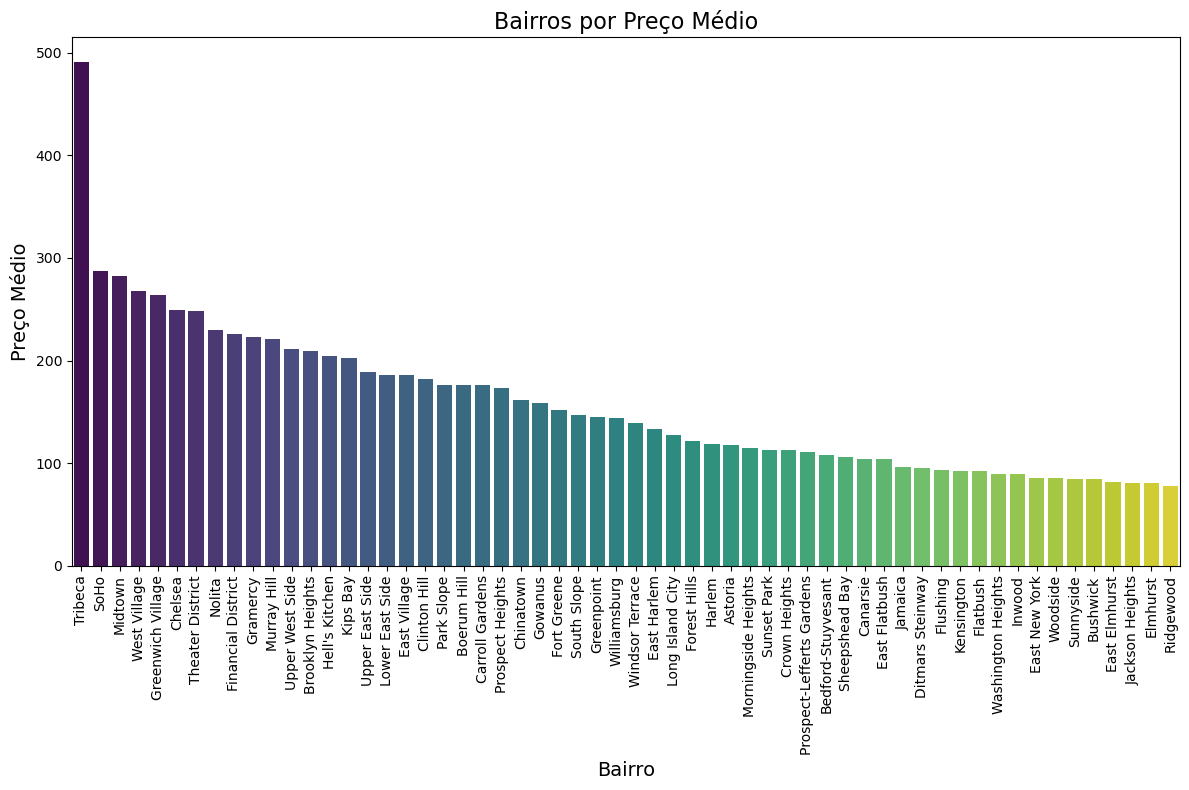

In [19]:
bairro_counts = df['bairro'].value_counts()
total_count = bairro_counts.sum()  
bairro_percentages = bairro_counts / total_count * 100  
#print(bairro_counts)
#print(total_count)
#print(bairro_percentages)

# Ordenar por frequência e calcular a porcentagem acumulada
bairro_cumulative = bairro_percentages.cumsum()
#print(bairro_cumulative)

#filtrar os 'bairros' mais frequentes
threshold_percentage = 90
frequent_bairros = bairro_cumulative[bairro_cumulative <= threshold_percentage].index

#filtrar as contagens originais para o gráfico
filtered_counts = bairro_counts[frequent_bairros]

#contagem de bairros
plt.figure(figsize=(12, 8))
sns.barplot(x=filtered_counts.index, y=filtered_counts.values, palette="viridis", hue=filtered_counts.index, legend=False)
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x em 90 para melhor legibilidade
plt.title(f"{threshold_percentage}% Bairros Mais Frequentes", fontsize=16)
plt.xlabel("Bairro", fontsize=14)
plt.ylabel("Contagem", fontsize=14)
plt.tight_layout()
plt.show()

# filtrar os dados do DataFrame original para os bairros mais frequentes
df_filtered = df[df['bairro'].isin(frequent_bairros)]

# Calcular o preço médio por bairro no DataFrame filtrado
mean_price_by_bairro = df_filtered.groupby('bairro')['price'].mean().sort_values(ascending=False)

# bairros com o maior preço médio
plt.figure(figsize=(12, 8))
sns.barplot(x=mean_price_by_bairro.index, y=mean_price_by_bairro.values, palette="viridis", hue=mean_price_by_bairro.index, legend=False)
plt.xticks(rotation=90)
plt.title("Bairros por Preço Médio", fontsize=16)
plt.ylabel("Preço Médio", fontsize=14)
plt.xlabel("Bairro", fontsize=14)
plt.tight_layout()
plt.show()

### Distribuição de listagens e média de preço por bairro_group 

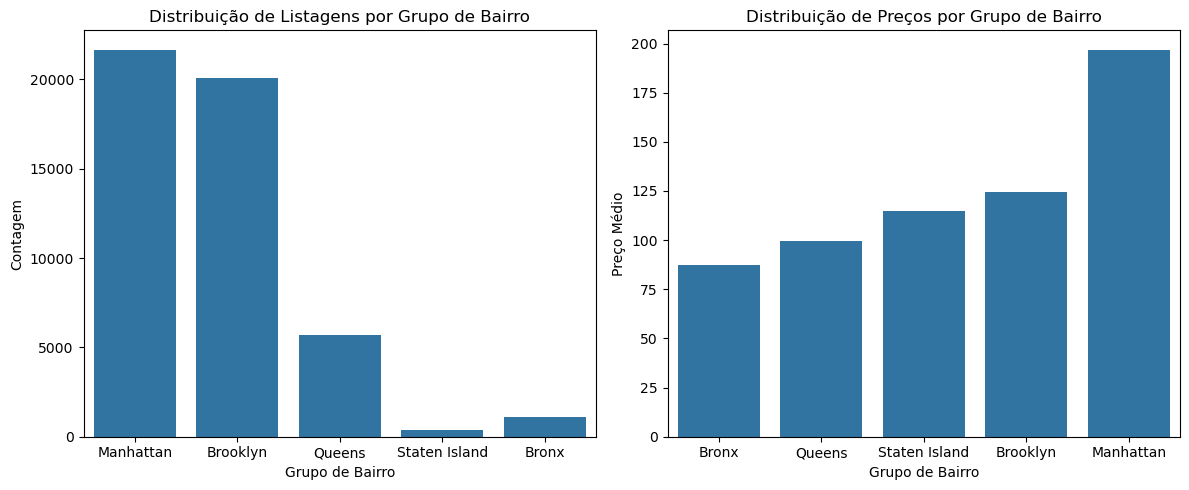

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Primeiro gráfico: Distribuição de listagens por bairro_group
sns.countplot(data=df, x='bairro_group', ax=axes[0])
axes[0].set_title('Distribuição de Listagens por Grupo de Bairro')
axes[0].set_xlabel('Grupo de Bairro')
axes[0].set_ylabel('Contagem')

# Segundo gráfico: Distribuição de preços por bairro_group
mean_prices = df.groupby('bairro_group')['price'].mean().sort_values()
sns.barplot(x=mean_prices.index, y=mean_prices.values, ax=axes[1])
axes[1].set_title('Distribuição de Preços por Grupo de Bairro')
axes[1].set_xlabel('Grupo de Bairro')
axes[1].set_ylabel('Preço Médio')

plt.tight_layout()
plt.show()

### Distribuição de listagens e média de preço por room_types 

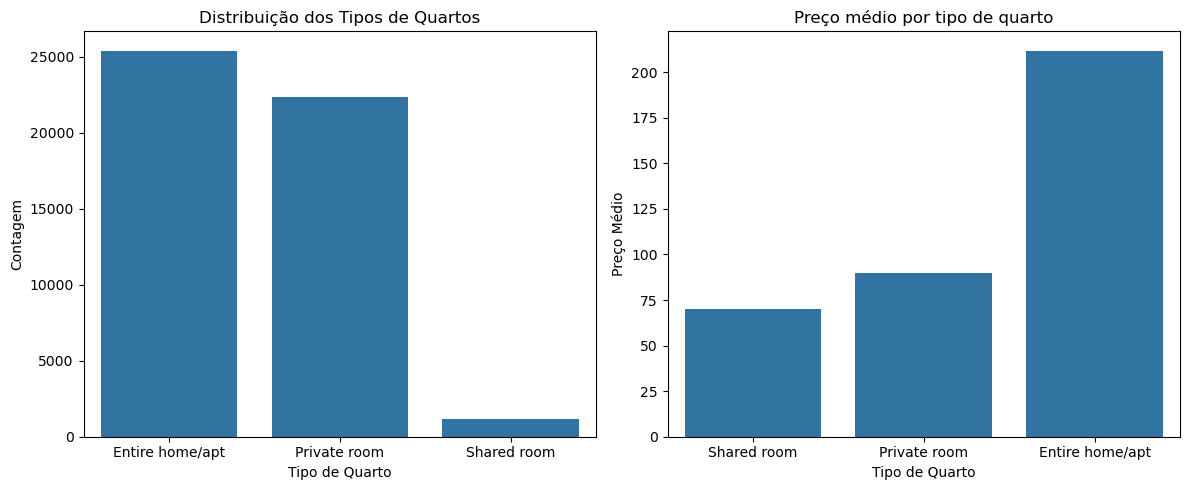

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Primeiro gráfico: Distribuição dos Tipos de Quartos
sns.countplot(data=df, x='room_type', ax=axes[0])
axes[0].set_title('Distribuição dos Tipos de Quartos')
axes[0].set_xlabel('Tipo de Quarto')
axes[0].set_ylabel('Contagem')

# Segundo gráfico: Preço médio por tipo de quarto
mean_prices2 = df.groupby('room_type')['price'].mean().sort_values()
sns.barplot(x=mean_prices2.index, y=mean_prices2.values, ax=axes[1])
axes[1].set_title('Preço médio por tipo de quarto')
axes[1].set_xlabel('Tipo de Quarto')
axes[1].set_ylabel('Preço Médio')

plt.tight_layout()
plt.show()

### Análise da correlação entre as variáveis numéricas

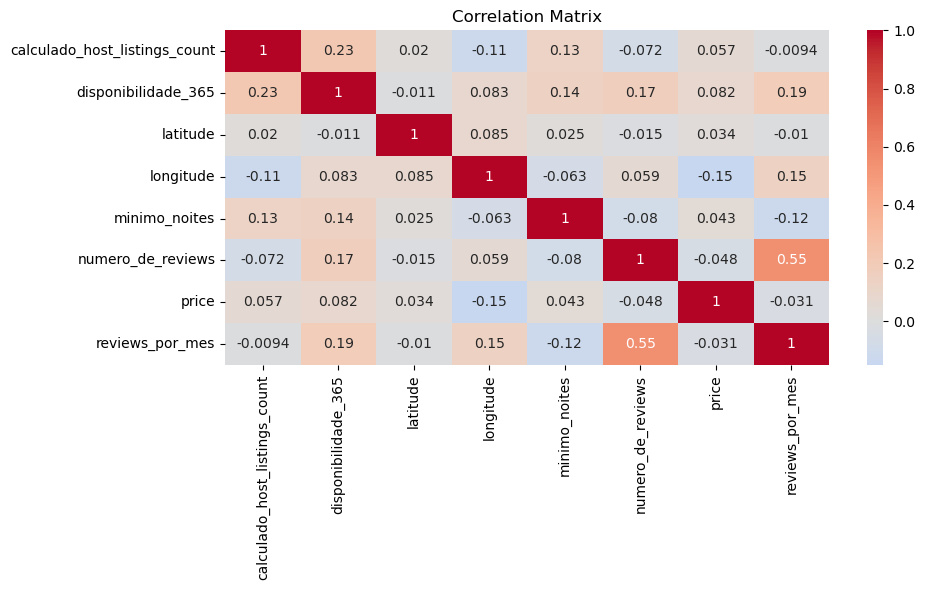

In [25]:
numerical_cols = numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.difference(['id', 'host_id'])

correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Mapa de distribuição espacial das listagens usando as variáveis latitude e longitude
#### Agrupadas por 'bairro_group', e em que os preços escalam com o tamanho dos círculos.
#### Pelo simples propósito de visualização estética.
#### Nota-se o formato da ilha de Manhattan e o retângulo do Central Park.

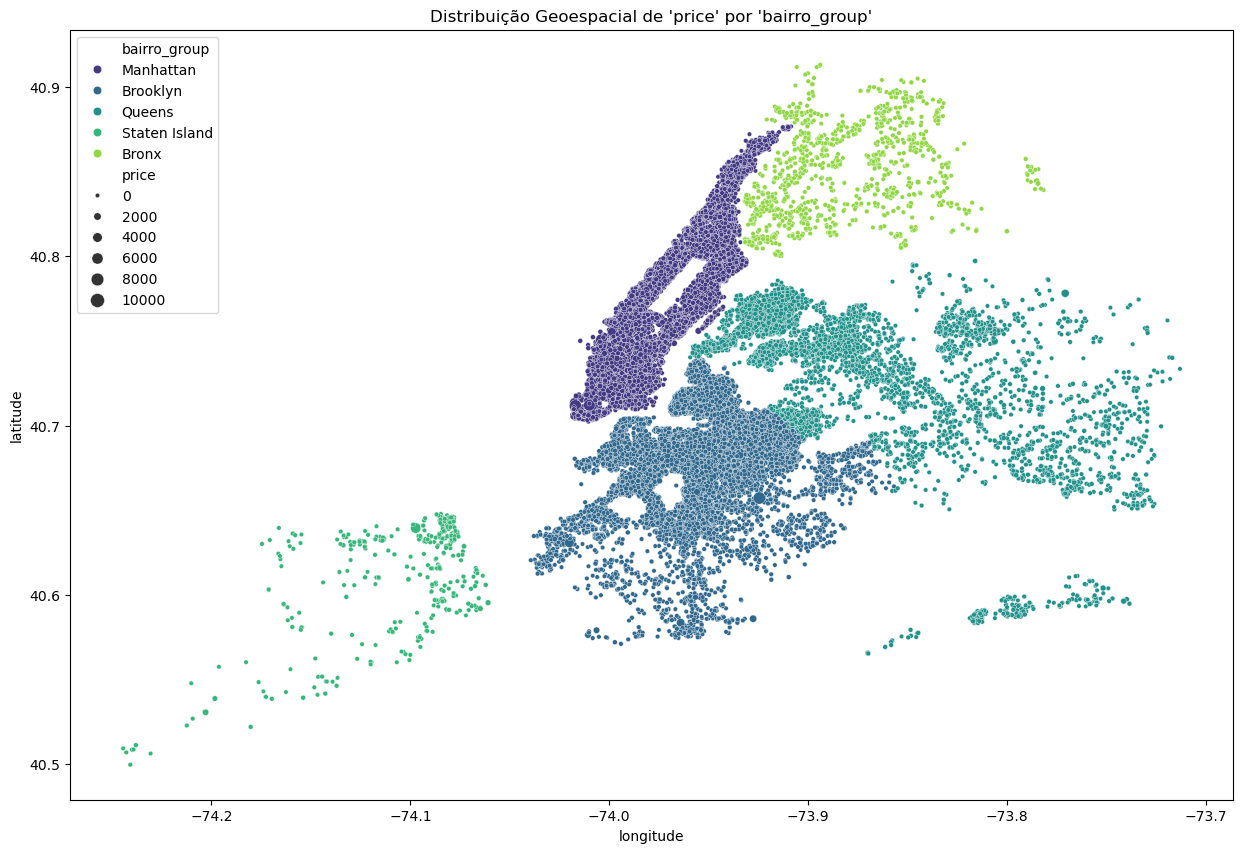

In [27]:
# Distribuição geoespacial dos preços por grupos de bairro
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='bairro_group', palette='viridis', size='price', sizes=(10, 100))
plt.title("Distribuição Geoespacial de 'price' por 'bairro_group'")
plt.show()

# Questões

## Melhor Lugar para Investir 
### Suposições com base na análise anterior:
Manhattan é provavelmente o melhor lugar para investir devido à alta demanda e altos preços médios.
Listagens de casas/apartamentos inteiros são mais lucrativas, mas podem exigir um investimento inicial mais alto.
Áreas com disponibilidade moderada (disponibilidade_365) e alta demanda podem ser priorizadas para investimento.

#### Análise 
Para determinar o melhor lugar para investir em um apartamento para aluguel, considerarei as variáveis preço médio, disponibilidade_365 e demanda (indicada pelo numero_reviews).

### Apliquei duas métricas, dependendo do objetivo da minha análise:

In [30]:
# Agrupar por bairro e calcular o preço médio, a disponibilidade e o total de avaliações
investment_analysis = df.groupby('bairro').agg({
    'price': 'mean',
    'disponibilidade_365': 'mean',
    'numero_de_reviews': 'sum'
}).reset_index()

# Renomear colunas
investment_analysis.rename(columns={
    'price': 'avg_price',
    'disponibilidade_365': 'avg_disponibilidade',
    'numero_de_reviews': 'total_reviews'
}, inplace=True)

# Medir a relação entre o preço médio e a disponibilidade
bairro_to_group = df[['bairro', 'bairro_group']].drop_duplicates().set_index('bairro')['bairro_group']
investment_analysis['bairro_group'] = investment_analysis['bairro'].map(bairro_to_group)

# Measure the relationship between mean price and availability
# Calcular a razão preço-disponibilidade
investment_analysis['price_to_availability_division'] = investment_analysis['avg_price'] / investment_analysis['avg_disponibilidade']
investment_analysis['price_to_availability_multiplication'] = investment_analysis['avg_price'] * investment_analysis['avg_disponibilidade']

#### Se o objetivo é maximizar a receita total gerada por uma propriedade, então a métrica `avg_price * avg_disponibilidade` é a mais adequada.  
Por exemplo, uma propriedade com um preço alto e alta disponibilidade gerará uma receita significativa.  
No entanto, essa métrica não leva em conta a acessibilidade ou a concorrência. Uma propriedade pode ter um grande potencial de receita, mas ser muito cara ou raramente alugada devido à saturação do mercado.

De acordo com essa métrica o melhor lugar para investir é **Bronx** ou **Staten Island**

In [32]:
# Exibir os bairros principais com base na divisão (quanto menor, melhor para o investimento)
best_investment_options = investment_analysis.sort_values(by='price_to_availability_division').head(10)
print(best_investment_options[['bairro', 'bairro_group', 'avg_price', 'avg_disponibilidade', 'price_to_availability_division']])

             bairro   bairro_group  avg_price  avg_disponibilidade  \
102     Hunts Point          Bronx  50.500000           239.166667   
42       Co-op City          Bronx  77.500000           364.000000   
46          Concord  Staten Island  58.192308           255.576923   
88       Grant City  Staten Island  57.666667           240.333333   
50           Corona         Queens  59.171875           244.171875   
165    Richmondtown  Staten Island  78.000000           300.000000   
27      Bull's Head  Staten Island  47.333333           165.666667   
207   West Brighton  Staten Island  80.555556           274.722222   
142  New Dorp Beach  Staten Island  57.400000           174.400000   
217       Woodhaven         Queens  67.170455           200.920455   

     price_to_availability_division  
102                        0.211150  
42                         0.212912  
46                         0.227690  
88                         0.239945  
50                         0.242337  
1

#### Se o objetivo for identificar oportunidades atraentes de investimento, que sejam tanto acessíveis quanto frequentemente disponíveis, então a métrica avg_price / avg_disponibilidade é uma escolha melhor.  
Essa relação ajuda a equilibrar dois fatores:
- **Acessibilidade**: Preços mais baixos tornam a propriedade mais acessível para os locatários.
- **Disponibilidade**: Maior disponibilidade aumenta a probabilidade de alugar a propriedade.
Uma relação baixa sugere que a propriedade é relativamente barata, mas frequentemente disponível, o que pode indicar uma boa oportunidade de investimento

De acordo com essa métrica o melhor lugar para investir é **Staten Island**

In [34]:
# Exibir os bairros principais com base na multiplicação (quanto maior, melhor para o investimento)
best_investment_options = investment_analysis.sort_values(by='price_to_availability_multiplication', ascending=False).head(10)
print(best_investment_options[['bairro', 'bairro_group', 'avg_price', 'avg_disponibilidade', 'price_to_availability_multiplication']])

               bairro   bairro_group   avg_price  avg_disponibilidade  \
82     Fort Wadsworth  Staten Island  800.000000           365.000000   
161     Randall Manor  Staten Island  336.000000           275.210526   
215       Willowbrook  Staten Island  249.000000           351.000000   
167         Riverdale          Bronx  442.090909           160.818182   
139          Neponsit         Queens  274.666667           231.000000   
197           Tribeca      Manhattan  490.638418           126.508475   
129        Mill Basin       Brooklyn  179.750000           290.000000   
191  Theater District      Manhattan  248.013889           201.871528   
65        Eastchester          Bronx  141.692308           333.461538   
157      Prince's Bay  Staten Island  409.500000           110.500000   

     price_to_availability_multiplication  
82                          292000.000000  
161                          92470.736842  
215                          87399.000000  
167                 

## Correlação entre 'price', 'minimo_noites' e 'disponibilidade_365'

**A partir da EDA:**

A variável reviews_por_mes tem correlação negativa com minimo_noites. 

Anúncios com menos noites mínimas tendem a ter preços mais baixos.

In [37]:
correlation = df[['price', 'minimo_noites', 'disponibilidade_365']].corr()
print("\nCorrelations with price:")
print(correlation['price'])


Correlations with price:
price                  1.000000
minimo_noites          0.042799
disponibilidade_365    0.081833
Name: price, dtype: float64


O preço tem correlações fracas com minimo_noites e disponibilidade_365.

### Padrões na nomenclatura de anúncios de alto preço:
A partir da análise abaixo, e, comparando as palavras que aparecem nos anúncios de alto valor e que não aparecem nos anúncios normais, conclui-se que as palavras mais comuns nos anúncios de alto preço são:

**loft, luxury, manhattan, spacious, park, village, nyc, bed, central**

In [40]:
# Cleaning DataFrame
df_cleaned = df.dropna()

regex = r'\b[a-zA-Z]+\b'

# Keywords de todas os anúncios
keywords_all = df_cleaned['nome'].str.lower().str.findall(regex).explode().str.split(expand=True).stack().value_counts()

# Keywords dos anúncios de alto valor
high_priced_listings = df_cleaned[df_cleaned['price'] > df_cleaned['price'].quantile(0.9)]
keywords_high_priced = high_priced_listings['nome'].str.lower().str.findall(regex).explode().str.split(expand=True).stack().value_counts()

# Concatenar os dois lado a lado usando pandas
keywords_combined = pd.concat([keywords_all.head(20), keywords_high_priced.head(20)], axis=1)
keywords_combined.columns = ['Todas as Listagens', 'Listagens de alto valor']

print(keywords_combined)

              Todas as Listagens  Listagens de alto valor
in                       13332.0                    913.0
room                      8278.0                      NaN
bedroom                   6444.0                    559.0
private                   6178.0                    212.0
apartment                 5376.0                    411.0
cozy                      4262.0                      NaN
apt                       3821.0                    370.0
brooklyn                  3467.0                      NaN
studio                    3233.0                      NaN
to                        3222.0                    213.0
the                       3124.0                    292.0
spacious                  3080.0                    263.0
manhattan                 2925.0                    265.0
park                      2544.0                    268.0
with                      2476.0                    266.0
of                        2424.0                    245.0
sunny         

# Modelo de previsão de preços

### Importar as bibliotecas
Estamos resolvendo um problema de regressão não-linear, porque a target variable 'price' é contínua.

Portanto, dois modelos foram escolhidos: **Polynomial Regression** e **Support Vector Regression (SVR)**.

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

##  Polynomial Regression
A Regressão Polinomial(Polynomial Regression) é uma "expansão" da Regressão Linear(Linear Regression) ao incorporar características polinomiais para capturar relações não lineares. A Regressão Polinomial aumenta as características com termos quadráticos e de interação, e pode capturar efetivamente não linearidades. No entanto, suas desvantagens incluem o risco de overfitting , com polinômios de grau mais alto, e uma possível explosão no número de características, o que pode levar ao aumento da complexidade computacional. 

### Pré-processamento e preparação das variáveis
Escolhi apenas as variáveis 'bairro_group', 'room_type' e  'bairro' porque, a partir da análise, são as que mais influenciam no preço.
Apliquei a tranformação logarítmica na variável 'price' porque foi notado que ela é muito 
Em seguida, o código utiliza o ColumnTransformer com um OneHotEncoder para codificar as variáveis 'bairro_group', 'room_type' e  'bairro' em variáveis binárias (0 ou 1), o que é importante para que o modelo consiga entender essas características.

In [46]:
X = df[['bairro_group', 'room_type', 'bairro']]
y = np.log1p(df['price'])  #transformar logaritmicamente a variável alvo(target variable) para ajudar a mitigar a assimetria

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['bairro_group', 'room_type', 'bairro'])
    ],
)

### Criar e organizar a pipeline de processamento 
Criado a pipeline de modelagem que aplica uma sequência de etapas para preparar os dados e treinar o modelo de regressão. 
A primeira etapa é o pré-processamento, que aplica o processamento configurado anteriormente.
Em seguida, a transformação PolynomialFeatures(degree=2) é usada para expandir as características, gerando termos quadráticos e de interação entre as variáveis, o que permite que o modelo capture relações não lineares entre elas.
Por fim, o modelo de LinearRegression é aplicado, e, combinado com as características polinomiais, realiza uma regressão polinomial.

In [48]:
modelPR = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2)), 
    ('regressor', LinearRegression())
])

Este código divide o conjunto de dados em dois subconjuntos: treino e teste, usando a função train_test_split, onde 80% dos dados são usados para treinamento e 20%(test_size=0.2) para teste, com uma semente aleatória definida por random_state=77.
Em seguida, o modelo é treinado com os dados de treino (X_train, y_train) usando o método fit().
Após o treinamento, o modelo faz previsões sobre o conjunto de teste (X_test) com o método predict().
Para avaliar o desempenho do modelo, utilizei duas métricas: o R2 Score, que mede a qualidade da regressão, e o RMSE (Root Mean Squared Error), que indica a precisão das previsões, sendo calculado pela raiz quadrada do erro quadrático médio. Quanto mais próximo de 1 mais preciso é o modelo.

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

modelPR.fit(X_train, y_train)

y_pred = modelPR.predict(X_test)

print("\nPolynomial Regression Model Performance:")
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Polynomial Regression Model Performance:
R2 Score: 0.5204998138949173
RMSE: 0.4836450663063488


### Previsão de preço de acordo com o apartamento
Abaixo é feita a previsão do preço de um apartamento específico com base em suas características. Primeiramente, ele cria um DataFrame contendo as informações do apartamento. Em seguida, o modelo treinado é usado para prever o preço do apartamento com o método predict(). A previsão é transformada usando np.expm1(), que aplica a função inversa do logaritmo natural (usada anteriormente no pré-processamento do preço), restaurando o valor original. Por fim, o preço previsto é printado no formato de moeda, mostrando o valor estimado para o apartamento.

In [52]:
apartmento = pd.DataFrame([{
    'bairro_group': 'Manhattan',
    'bairro': 'Midtown',
    'latitude': 40.75362,
    'longitude': -73.98377,
    'room_type': 'Entire home/apt', 
    'minimo_noites': 1,
    'numero_de_reviews': 45, 
    'reviews_por_mes': 0.38,
    'calculado_host_listings_count': 2,
    'disponibilidade_365': 355
}])
predicted_price = np.expm1(modelPR.predict(apartmento)) # inverso da transformação logarítmica
print(f'Predicted Price: ${predicted_price[0]:.2f}')

Predicted Price: $242.03


## Support Vector Regression (SVR)
O SVR, especialmente com um núcleo RBF, utiliza métodos de núcleo para modelar padrões não lineares complexos sem gerar explicitamente características polinomiais. O SVR pode ser mais flexível devido à sua abordagem de núcleo. Seus pontos negativos incluem maior custo computacional, sensibilidade às configurações de hiperparâmetros (como C, epsilon e gama).
O código é similar ao anterior, sendo a única diferença o modelo utilizado - SVR.

##### Parâmetros do SVR:

**kernel='rbf'**: define o tipo de kernel utilizado pelo SVR. O kernel "RBF" (Radial Basis Function) é uma função de base radial que transforma os dados para um espaço de alta dimensão onde as relações não lineares podem ser modeladas de forma mais eficaz. O kernel RBF é utilizado quando os dados possuem padrões não lineares.

**C=1.0**: controla a penalização por erros no modelo. Quanto maior o valor de C, maior será a penalidade para os erros, ou seja, o modelo tentará se ajustar mais precisamente aos dados de treinamento, o que pode aumentar o risco de overfitting (ajuste excessivo aos dados de treinamento). Um valor menor de C permite uma margem maior de erro, o que pode ajudar a evitar o overfitting, mas com a possibilidade de um ajuste menos preciso aos dados.

**epsilon=0.1**: define uma margem de tolerância em torno da linha de previsão, dentro da qual os erros são considerados aceitáveis e não penalizados. Em outras palavras, ele controla o quão próximos os pontos de dados precisam estar da previsão para serem considerados como "sem erro". Um valor pequeno de epsilon torna o modelo mais rigoroso em relação aos erros, enquanto um valor maior permite uma maior flexibilidade, possibilitando algumas previsões estarem erradas sem penalização.

In [54]:
X = df[['bairro_group', 'room_type', 'bairro']] 
y = np.log1p(df['price']) 

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['bairro_group', 'room_type', 'bairro'])
    ],
    remainder='drop'
)

# Construa um pipeline que inclui pré-processamento, scaling e o modelo SVR
modelSVR = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False)), #StandardScaler(with_mean=False) é adicionado pois o SVR é sensível à escala das características de entrada.
    ('regressor', SVR(kernel='rbf', C=1.0, epsilon=0.1)) #explicação dos parâmetros na célula acima
])

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=77) #mesmos valores do modelo polinomial para melhor comparação

modelSVR.fit(X_train, y_train)

y_pred = modelSVR.predict(X_test)

print("\nModel Performance:")
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

apartmento = pd.DataFrame([{
    'bairro_group': 'Manhattan',
    'bairro': 'Midtown',
    'latitude': 40.75362,
    'longitude': -73.98377,
    'room_type': 'Entire home/apt', 
    'minimo_noites': 1,
    'numero_de_reviews': 45, 
    'reviews_por_mes': 0.38,
    'calculado_host_listings_count': 2,
    'disponibilidade_365': 355
}])
predicted_price = np.expm1(modelSVR.predict(apartmento))
print(f'Predicted Price: ${predicted_price[0]:.2f}')


Model Performance:
R2 Score: 0.5097826047819001
RMSE: 0.4890201233177916
Predicted Price: $221.22


## Salvar os modelos em .pkl com pickle

In [56]:
import pickle

#salvando o modelo polinomial
with open('modelo_previsão_de_preco_PR.pkl', 'wb') as f:
    pickle.dump(modelPR, f)
print("modelo Polinomial salvo")

#salvando o modelo SVR
with open('modelo_previsão_de_preco_SVR.pkl', 'wb') as f:
    pickle.dump(modelSVR, f)
print("modelo SVR salvo")

modelo Polinomial salvo
modelo SVR salvo
